In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create classifiers
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred) 

0.9166666666666667

In [22]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.8/dist-packages (0.8.0)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


Automatically created module for IPython interactive environment


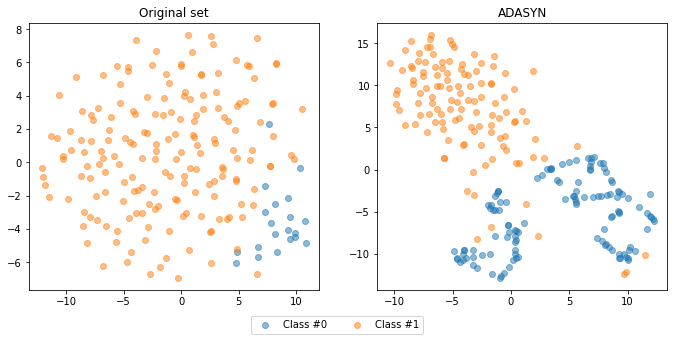

In [23]:
import matplotlib.pyplot as plt


from imblearn.over_sampling import ADASYN
from sklearn.manifold import TSNE

# Instanciate a PCA object for the sake of easy visualisation
tsne = TSNE(n_components=2)
X_vis = tsne.fit_transform(X)

# Apply the random over-sampling
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X_train, y_train)
X_res_vis = tsne.fit_transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('ADASYN')

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create classifiers
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
y_pred = rfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred) 

0.9916666666666667

Automatically created module for IPython interactive environment


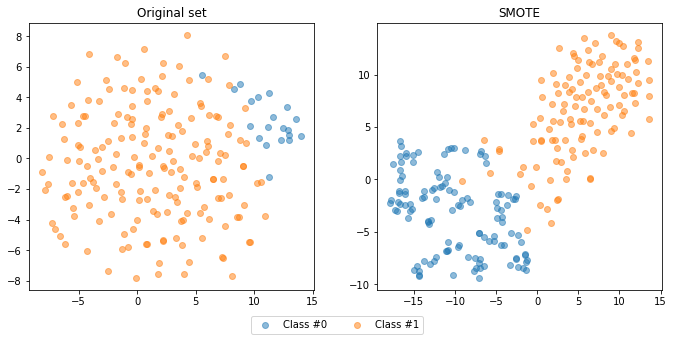

In [25]:
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

# Fit and transform x to visualise inside a 2D feature space
tsne = TSNE(n_components=2)
X_vis = tsne.fit_transform(X)

# Apply the random over-sampling
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)
X_res_vis = tsne.fit_transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('SMOTE')


plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create classifiers
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
y_pred = rfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred) 

1.0

In [28]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train) 

y_pred = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred) 

0.95